In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

(1, 3, 3, 1)


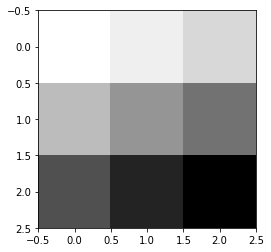

In [5]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]]
                  ,[[4],[5],[6]],
                  [[7],[8],[9]]]],dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap='Greys')
sess.close()

conv2d_img.shape (1, 3, 3, 1)
[[162. 198. 234.]
 [414. 450. 486.]
 [666. 702. 738.]]


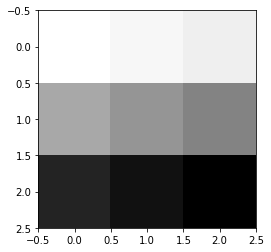

In [21]:
sess = tf.InteractiveSession()

image = np.arange(1,50,dtype = np.float32).reshape(1,7,7,1)
w_filter = tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1)*2)
conv2d= tf.nn.conv2d(input=image,filter=w_filter,strides=[1,2,2,1],padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3),cmap='Greys')
sess.close()

conv2d_img.shape (1, 2, 2, 1)
[[162. 216.]
 [540. 594.]]


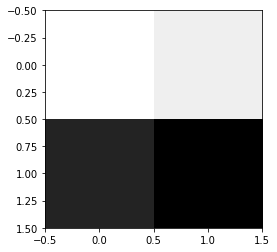

In [22]:
sess = tf.InteractiveSession()

image = np.arange(1,50,dtype = np.float32).reshape(1,7,7,1)
w_filter = tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1)*2)
conv2d= tf.nn.conv2d(input=image,filter=w_filter,strides=[1,3,3,1],padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img.reshape(2,2))
plt.imshow(conv2d_img.reshape(2,2),cmap='Greys')
sess.close()

In [34]:
sess = tf.InteractiveSession()
image = np.ones(121,dtype=np.float32).reshape(1,11,11,1)
w_filter = tf.constant(np.ones(36,dtype=np.float32).reshape(6,6,1,1))
conv2d_1 = tf.nn.conv2d(input=image,filter=w_filter,strides=[1,4,4,1],padding='VALID')
conv2d_2 = tf.nn.conv2d(input=image,filter=w_filter,strides=[1,4,4,1],padding='SAME')
print(conv2d_1.eval().reshape(2,2))
print(conv2d_2.eval().reshape(3,3))


[[36. 36.]
 [36. 36.]]
[[25. 30. 20.]
 [30. 36. 24.]
 [20. 24. 16.]]


In [37]:
sess = tf.InteractiveSession()
image = np.arange(1,17,dtype=np.float32).reshape(1,4,4,1)
max_pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
avg_pool = tf.nn.avg_pool(image,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

print(max_pool.eval().shape)
print(max_pool.eval().reshape(2,2))
print(avg_pool.eval().reshape(2,2))

(1, 2, 2, 1)
[[ 6.  8.]
 [14. 16.]]
[[ 3.5  5.5]
 [11.5 13.5]]


In [38]:
sess = tf.InteractiveSession()
image = np.arange(1,37,dtype=np.float32).reshape(1,6,6,1)
pool_1 = tf.nn.max_pool(image,ksize=[1,5,5,1],strides=[1,4,4,1],padding='VALID')
pool_2 = tf.nn.max_pool(image,ksize=[1,5,5,1],strides=[1,4,4,1],padding='SAME')

print(pool_1.eval().shape)
print(pool_1.eval().reshape(1,1))
print(pool_2.eval().shape)
print(pool_2.eval().reshape(2,2))


(1, 1, 1, 1)
[[29.]]
(1, 2, 2, 1)
[[22. 24.]
 [34. 36.]]


In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


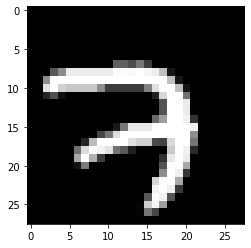

In [46]:
img = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img,cmap='gray')

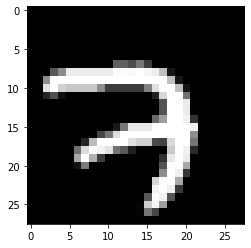

In [47]:
plt.imshow(img,cmap=plt.cm.gray)

Tensor("Conv2D_29:0", shape=(1, 14, 14, 5), dtype=float32)


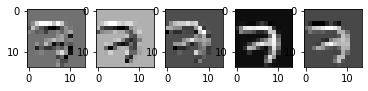

In [55]:
sess = tf.InteractiveSession()
img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5)) -0.5
#random.random = 0~1 사이의 값 무작위 선택
# 3x3 크기의 필터 5개 , -0.5 를 한다면 필터에 음수값이 들어간다.
conv2d = tf.nn.conv2d(img,w_filter,strides=[1,2,2,1],padding='SAME')
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14),cmap='gray')
    
sess.close()

In [81]:
from PIL import Image as Im
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

lena = Im.open('lena.png')
print(lena.size)
lena = lena.resize((200,200))
lena = lena.convert('L')
lena = np.array(lena,dtype=np.float32)
lena = lena.reshape(1,200,200,1)
lena.shape

#filters
K1 = tf.constant([[[[-1,]],[[-1.]],[[-1.]]],[[[-1.]],[[9]],[[-1]]],[[[-1.]],[[-1.]],[[-1.]]]])
blur = tf.constant([[[[1,]],[[1.]],[[1.]]],[[[1.]],[[1]],[[1]]],[[[1.]],[[1.]],[[1.]]]])
Sharpen = tf.constant([[[[0,]],[[-1.]],[[0.]]],[[[-1.]],[[5]],[[-1]]],[[[0]],[[-1.]],[[0]]]])

# K1 size = (3,3,1,1) = [ht,wdth,channel,개수]
a1 = tf.nn.conv2d(lena,K1,strides=[1,1,1,1],padding='VALID')
a2 = tf.nn.conv2d(lena,blur,strides=[1,1,1,1],padding='VALID')
a3 = tf.nn.conv2d(lena,Sharpen,strides=[1,1,1,1],padding='VALID')
                    
#본격적인 실행
sess = tf.Session()
a1 = sess.run(a1)
a2 = sess.run(a2)
a1.shape # = [1,198,198,1] = [channel수,ht,wdth,batch]
a1_img = np.swapaxes(a1,0,3) # 채널을 뒤로 보내고 batch 사이즈를 앞으로 떙겨온다.
a2_img = np.swapaxes(a2,0,3)
a1_img.shape # axis 0 과 3을 서로 바꾸기 => [1,198,198,1] = [batch,ht,wdth,channel수]

(512, 512)


(1, 198, 198, 1)

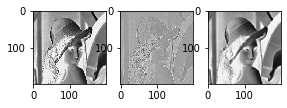

In [84]:
h1 = tf.nn.max_pool(a1_img,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
h1 = sess.run(h1)
h1.shape # 풀링의 개수가 많아지면 계산 못함. 확인해라.
plt.subplot(1,4,1)
plt.imshow(lena.reshape(200,200),cmap = 'Greys') # gray scale
plt.subplot(1,4,2)
plt.imshow(a1_img.reshape(198,198),cmap='Greys') # K1 필터 적용
plt.subplot(1,4,3)
plt.imshow(a2_img.reshape(198,198),cmap='Greys') # K1 필터 적용


In [87]:
sess = tf.InteractiveSession()
image = np.arange(1,10,dtype=np.float32).reshape(1,3,3,1)
w_filter = np.array([1,1,1,1,2,2,2,2,3,3,3,3],dtype=np.float32).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter,0,2)
w_filter = np.swapaxes(w_filter,1,3)
conv2d = tf.nn.conv2d(input=image,filter=w_filter,strides=[1,1,1,1],padding='SAME')
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3).reshape(3,3,3)
print("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)
sess.close()

conv2d_img.shape (3, 3, 3)
[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]


In [1]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

In [27]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/",one_hot=True)
tf.reset_default_graph()

learning_rate = 0.001
training_epochs = 20
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
#L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1],
#                    strides=[1, 2, 2, 1], padding='SAME')

L3_flat = tf.reshape(L3, [-1, 7 * 7 * 64])
#Final FC 7x7x64 inputs -> 10 outputs
W4 = tf.get_variable("W4", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
# get_variable 메서드는 한번 등록되면 지워지지 않는다. 여기선 W3인 경우. 
# tf.reset_default_graph()  를 통해서 지워야 한다.
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L3_flat, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initalize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1)) 
# argmax(X,axis=0) X중에서 axis=0(열을 기준으로) 보겠다. axis=1(행을 기준으로)
accuarcy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
# tf.cast : 1이면 True로 반환
print('Accuracy:',sess.run(accuarcy,feed_dict={
    X: mnist.test.images, Y: mnist.test.labels}))

#Get one and predict
r = random.randint(0,mnist.test.num_examples - 1)
print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction :", sess.run(
tf.argmax(logits,1),feed_dict={X:mnist.test.images[r:r+1]}))
sess.close()

Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/train-images-idx3-ubyte.gz
Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/train-labels-idx1-ubyte.gz
Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Shape must be rank 2 but is rank 4 for 'MatMul' (op: 'MatMul') with input shapes: [?,3136], [3,3,64,128].

In [51]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/",one_hot=True)
tf.reset_default_graph()

#신경망 모델 구성
X = tf.placeholder(tf.float32,[None,28,28,1])
Y = tf.placeholder(tf.float32,[None,10])
is_training = tf.placeholder(tf.bool)

L1 = tf.layers.conv2d(X,32,[3,3],activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1,[2,2],[2,2])
L1 = tf.layers.dropout(L1,0.8,is_training)

L2 = tf.layers.conv2d(L1,64,[3,3],activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2,[2,2],[2,2])
L2 = tf.layers.dropout(L2,0.8,is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3,256,activation=tf.nn.relu)
L3 = tf.layers.dropout(L3,0.5,is_training)

model = tf.layers.dense(L3,10,activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1,28,28,1)
        _,cost_val = sess.run([optimizer,cost],
                           feed_dict = {X: batch_xs,
                                        Y: batch_ys,
                                       is_training : True})
        total_cost += cost_val
    print('Epoch:','%04d'%(epoch +1),
         'Avg. cost=', '{:.4f}'.format(total_cost/total_batch))
    
print("최적화 완료")

Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/train-images-idx3-ubyte.gz
Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/train-labels-idx1-ubyte.gz
Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/Affinity/Documents/KSA\Module6/MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost= 0.1787
Epoch: 0002 Avg. cost= 0.0502
Epoch: 0003 Avg. cost= 0.0339
Epoch: 0004 Avg. cost= 0.0248
Epoch: 0005 Avg. cost= 0.0183
Epoch: 0006 Avg. cost= 0.0140
Epoch: 0007 Avg. cost= 0.0112
Epoch: 0008 Avg. cost= 0.0097
Epoch: 0009 Avg. cost= 0.0086
Epoch: 0010 Avg. cost= 0.0069
Epoch: 0011 Avg. cost= 0.0047
Epoch: 0012 Avg. cost= 0.0054
Epoch: 0013 Avg. cost= 0.0051
Epoch: 0014 Avg. cost= 0.0055
Epoch: 0015 Avg. cost= 0.0037
최적화 완료


In [52]:
is_correct = tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
print('정확도:',sess.run(accuracy,
                     feed_dict = {X: mnist.test.images.reshape(-1,28,28,1),
                                 Y: mnist.test.labels,
                                 is_training : False}))

정확도: 0.9929
